This notebook is the testing ground for features of the TSmode and ACTDR modules.

In [1]:
import ACTDR
import TSmode
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import calendar
from mpl_toolkits.basemap import Basemap
from scipy.interpolate import griddata

%matplotlib inline

In [2]:
sns.set()
sns.set_style('darkgrid')
sns.set_context('paper')

In [3]:
ACTDR.reset_global()
ACTDR.load_dat('DB_v02.dat')

wcvi_top = TSmode.get_topo()

> open  DB_v02.dat
> load CTD_DAT
> load STANDARD_KEYS
> close  DB_v02.dat
> complete


In [4]:
mnth_csts = []

for ii in range(1,13):
    mnth_csts.append(TSmode.filter_CTD_list('MONTH',ii))

In [34]:
# get June mode
Sgr,Tgr,modeDAT,modeIND = TSmode.get_TSmode(mnth_csts[5])
print 'S:', Sgr[modeIND[0]], '-', Sgr[modeIND[0]+1]
print 'T:', Tgr[modeIND[1]], '-', Tgr[modeIND[1]+1]

S: 34.0 - 34.25
T: 4 - 5


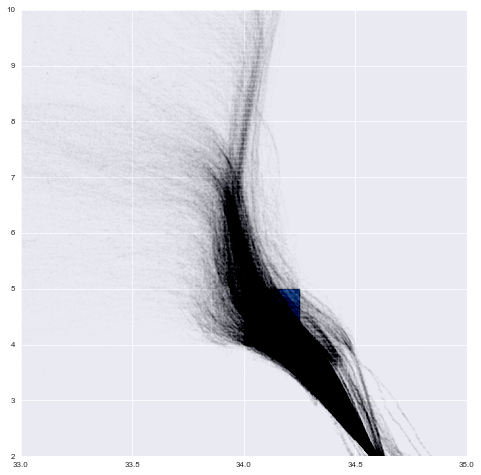

In [56]:
Scasts = [x for k in modeDAT for x in k['Salinity']]
Tcasts = [x for k in modeDAT for x in k['Temperature']]

plt.figure(figsize=(8,8))
plt.plot(Scasts,Tcasts,'.k',ms=1,alpha=0.1)
plt.fill_between([Sgr[modeIND[0]],Sgr[modeIND[0]+1]],[Tgr[modeIND[1]],Tgr[modeIND[1]]],[Tgr[modeIND[1]+1],Tgr[modeIND[1]+1]],alpha=1)
plt.xlim((33,35))
plt.ylim((2,10))
plt.show()

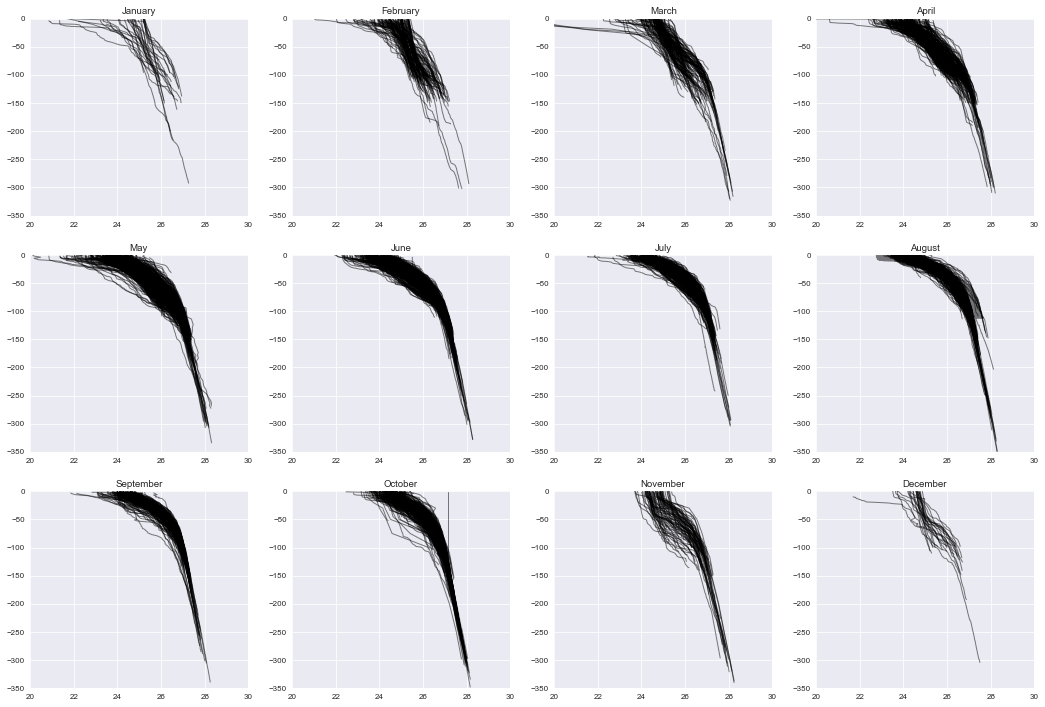

In [10]:
plt.figure(figsize=(18,12))

# get June mode
for mnth in range(1,13):
    plt.subplot(3,4,mnth)
    #Sgr,Tgr,modeDAT,modeIND = TSmode.get_TSmode(mnth_csts[mnth-1])
    #print 'S:', Sgr[modeIND[0]], '-', Sgr[modeIND[0]+1]
    #print 'T:', Tgr[modeIND[1]], '-', Tgr[modeIND[1]+1]
    for c in mnth_csts[mnth-1]:
        plt.plot(c['sigmaT'],-np.array(c['Depth']),'-k',lw=1,alpha=0.5)
    plt.xlim((20,30))
    plt.ylim((-350,0))
    plt.title(calendar.month_name[mnth])

plt.show()

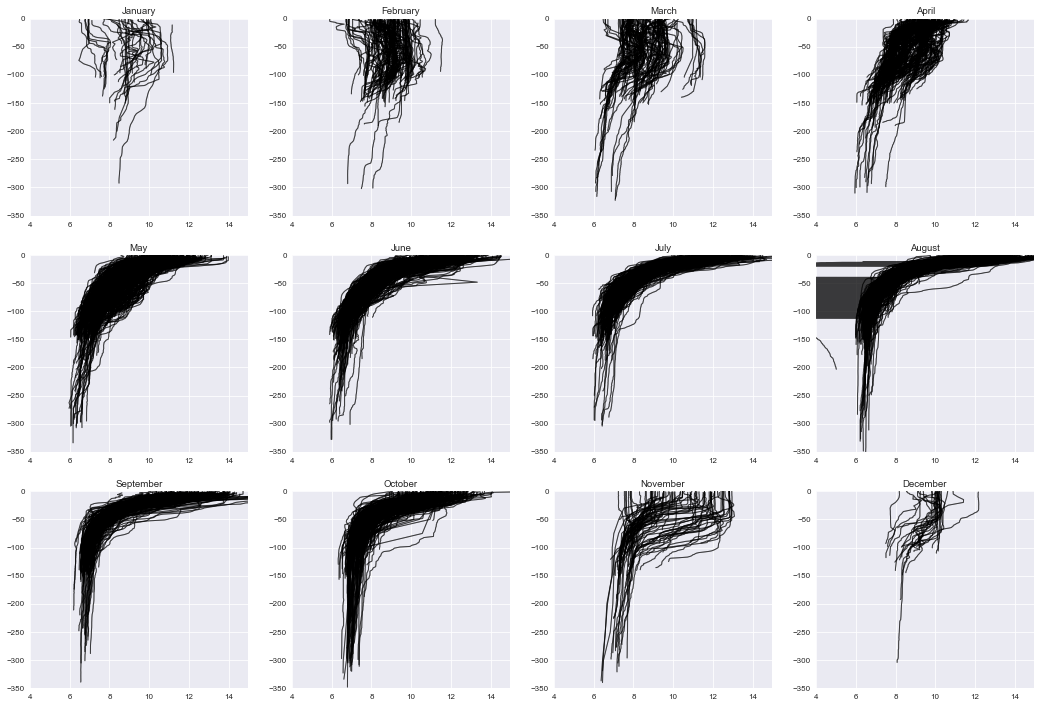

In [39]:
plt.figure(figsize=(18,12))

# get June mode
for mnth in range(1,13):
    plt.subplot(3,4,mnth)
    #Sgr,Tgr,modeDAT,modeIND = TSmode.get_TSmode(mnth_csts[mnth-1])
    #print 'S:', Sgr[modeIND[0]], '-', Sgr[modeIND[0]+1]
    #print 'T:', Tgr[modeIND[1]], '-', Tgr[modeIND[1]+1]
    for c in mnth_csts[mnth-1]:
        plt.plot(c['Temperature'],-np.array(c['Depth']),'-k',lw=1,alpha=0.5)
    plt.xlim((4,15))
    plt.ylim((-350,0))
    plt.title(calendar.month_name[mnth])

plt.show()

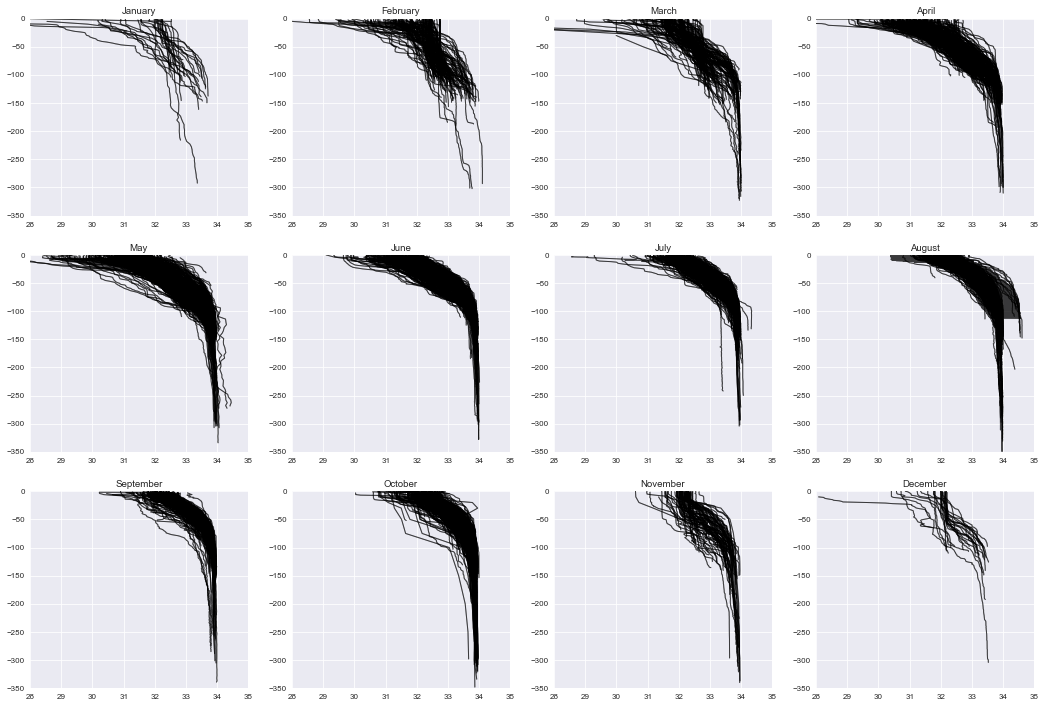

In [40]:
plt.figure(figsize=(18,12))

# get June mode
for mnth in range(1,13):
    plt.subplot(3,4,mnth)
    #Sgr,Tgr,modeDAT,modeIND = TSmode.get_TSmode(mnth_csts[mnth-1])
    #print 'S:', Sgr[modeIND[0]], '-', Sgr[modeIND[0]+1]
    #print 'T:', Tgr[modeIND[1]], '-', Tgr[modeIND[1]+1]
    for c in mnth_csts[mnth-1]:
        plt.plot(c['Salinity'],-np.array(c['Depth']),'-k',lw=1,alpha=0.5)
    plt.xlim((28,35))
    plt.ylim((-350,0))
    plt.title(calendar.month_name[mnth])

plt.show()

> using  1936  cast data


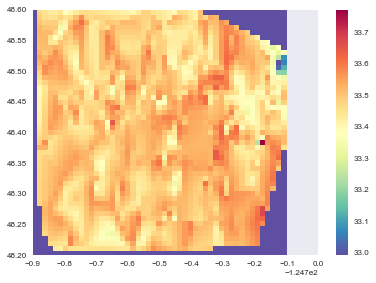

In [4]:
(lon_region,lat_region,grid_dat) = TSmode.get_isopyc_surface(ACTDR.CTD_DAT,26.5,'Salinity',[-125.6,-124.8],[48.2,48.6])

plt.pcolor(lon_region,lat_region,grid_dat,cmap='Spectral_r')
plt.clim((np.nanmin(grid_dat),np.nanmax(grid_dat)))
plt.colorbar()
plt.show()

> using  1937  cast data


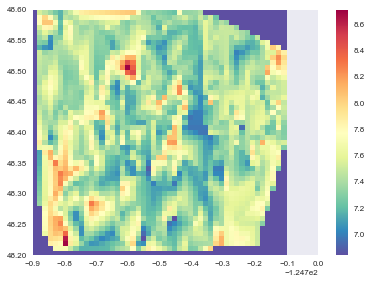

In [6]:
(lon_region,lat_region,grid_dat) = TSmode.get_isopyc_surface(ACTDR.CTD_DAT,26.5,'Temperature',[-125.6,-124.8],[48.2,48.6])

plt.pcolor(lon_region,lat_region,grid_dat,cmap='Spectral_r')
plt.clim((np.nanmin(grid_dat),np.nanmax(grid_dat)))
plt.colorbar()
plt.show()

> using  3563  cast data
> using  5300  cast data
> using  5259  cast data
> using  6095  cast data
> using  9806  cast data
> using  8353  cast data
> using  7932  cast data
> using  8171  cast data
> using  6177  cast data
> using  6193  cast data
> using  4180  cast data
> using  1996  cast data


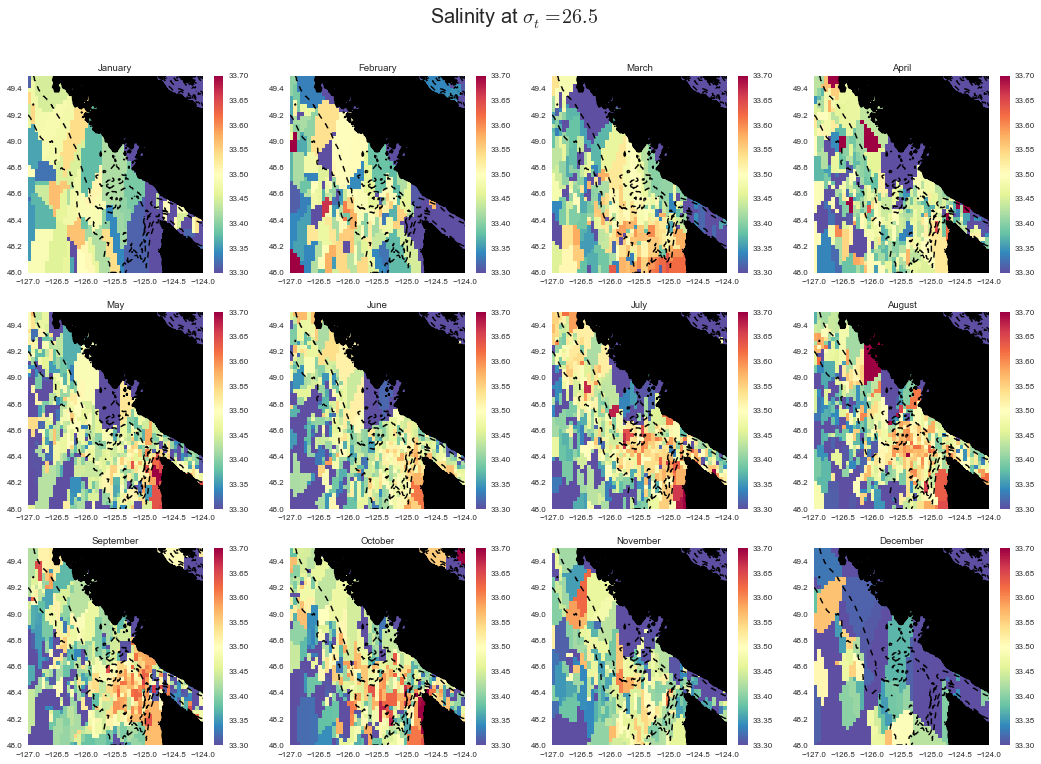

In [33]:
plt.figure(figsize=(18,12))
for ii in range(1,13):
    plt.subplot(3,4,ii)
    (lon_region,lat_region,grid_dat) = TSmode.get_isopyc_surface(mnth_csts[ii-1],26.5,'Salinity',[-127,-124],[48,49.5])
    plt.pcolor(lon_region,lat_region,grid_dat,cmap='Spectral_r')
    plt.clim((33.3,33.7))
    plt.colorbar()
    plt.contour(wcvi_top['lon'],wcvi_top['lat'],wcvi_top['dpth'],[-250,-100,0],colors='k')
    plt.contourf(wcvi_top['lon'],wcvi_top['lat'],wcvi_top['dpth'],[0,0],colors='k',lw=1)
    plt.xlim((-127,-124))
    plt.ylim((48,49.5))
    plt.title(calendar.month_name[ii])
plt.suptitle(r'Salinity at $\sigma_t = 26.5$',fontsize=20)
plt.show()

> using  3576  cast data
> using  5334  cast data
> using  5294  cast data
> using  6133  cast data
> using  9893  cast data
> using  8380  cast data
> using  7976  cast data
> using  8217  cast data
> using  6224  cast data
> using  6212  cast data
> using  4190  cast data
> using  2004  cast data


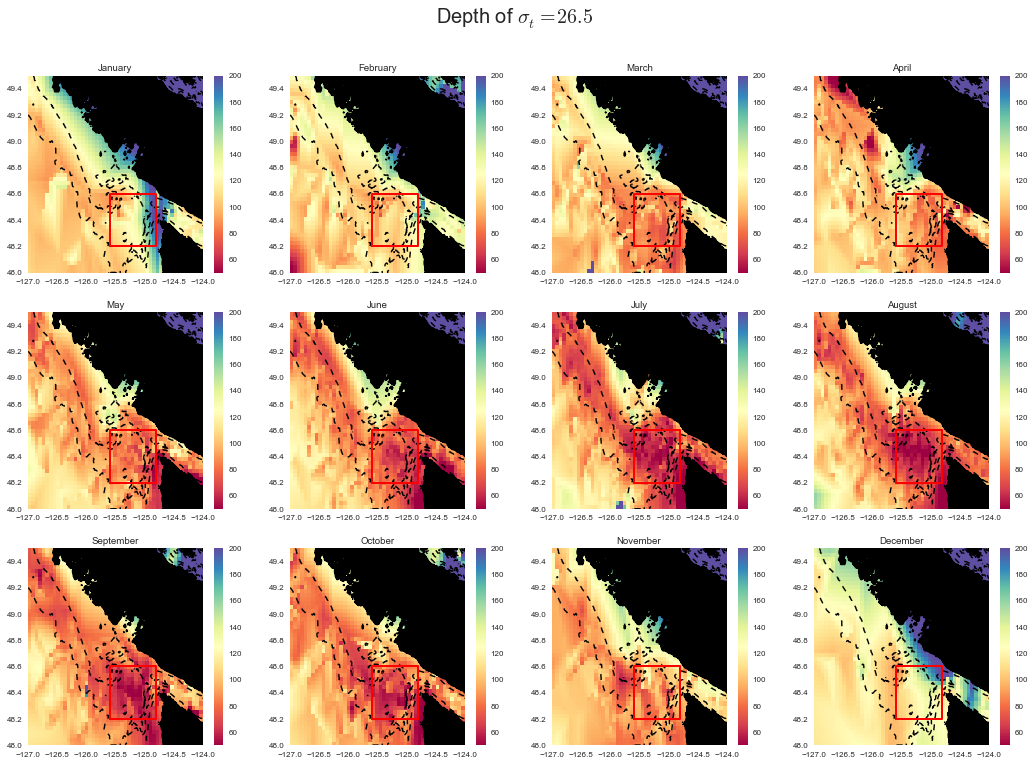

In [10]:
plt.figure(figsize=(18,12))
for ii in range(1,13):
    plt.subplot(3,4,ii)
    (lon_region,lat_region,grid_dat,tmp) = TSmode.get_isopyc_surface(mnth_csts[ii-1],26.5,'Depth',[-127,-124],[48,49.5])
    plt.pcolormesh(lon_region,lat_region,grid_dat,cmap='Spectral',shading='interp')
    plt.clim((50,200))
    plt.colorbar()
    plt.plot([-125.6,-124.8,-124.8,-125.6,-125.6],[48.2,48.2,48.6,48.6,48.2],'-r',lw=2)
    plt.contour(wcvi_top['lon'],wcvi_top['lat'],wcvi_top['dpth'],[-250,-100,0],colors='k')
    plt.contourf(wcvi_top['lon'],wcvi_top['lat'],wcvi_top['dpth'],[0,0],colors='k',lw=1)
    plt.xlim((-127,-124))
    plt.ylim((48,49.5))
    plt.title(calendar.month_name[ii])
plt.suptitle(r'Depth of $\sigma_t = 26.5$',fontsize=20)
plt.show()

> using  3284  cast data
> using  4744  cast data
> using  4188  cast data
> using  4676  cast data
> using  7468  cast data
> using  6205  cast data
> using  6222  cast data
> using  6340  cast data
> using  5051  cast data
> using  4939  cast data
> using  3369  cast data
> using  1604  cast data


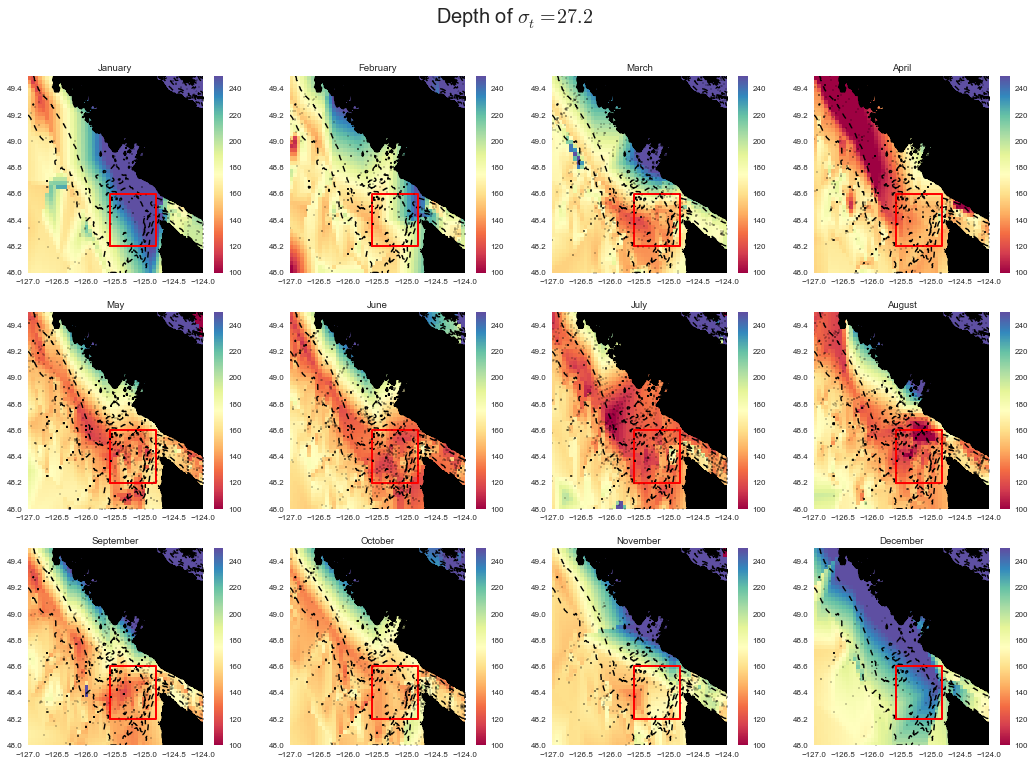

In [12]:
plt.figure(figsize=(18,12))
for ii in range(1,13):
    plt.subplot(3,4,ii)
    (lon_region,lat_region,grid_dat,tmp) = TSmode.get_isopyc_surface(mnth_csts[ii-1],27.2,'Depth',[-127,-124],[48,49.5])
    plt.pcolormesh(lon_region,lat_region,grid_dat,cmap='Spectral',shading='interp')
    plt.clim((100,250))
    plt.colorbar()
    plt.plot([-125.6,-124.8,-124.8,-125.6,-125.6],[48.2,48.2,48.6,48.6,48.2],'-r',lw=2)
    plt.contour(wcvi_top['lon'],wcvi_top['lat'],wcvi_top['dpth'],[-250,-100,0],colors='k')
    plt.contourf(wcvi_top['lon'],wcvi_top['lat'],wcvi_top['dpth'],[0,0],colors='k',lw=1)
    
    plt.plot([k['Longitude'] for k in mnth_csts[ii-1]],[k['Latitude'] for k in mnth_csts[ii-1]],'.k',ms=2)
    plt.xlim((-127,-124))
    plt.ylim((48,49.5))
    plt.title(calendar.month_name[ii])
plt.suptitle(r'Depth of $\sigma_t = 27.2$',fontsize=20)
plt.show()

> using  3270  cast data
> using  4708  cast data
> using  4161  cast data
> using  4642  cast data
> using  7394  cast data
> using  6181  cast data
> using  6192  cast data
> using  6310  cast data
> using  5016  cast data
> using  4919  cast data
> using  3360  cast data
> using  1598  cast data


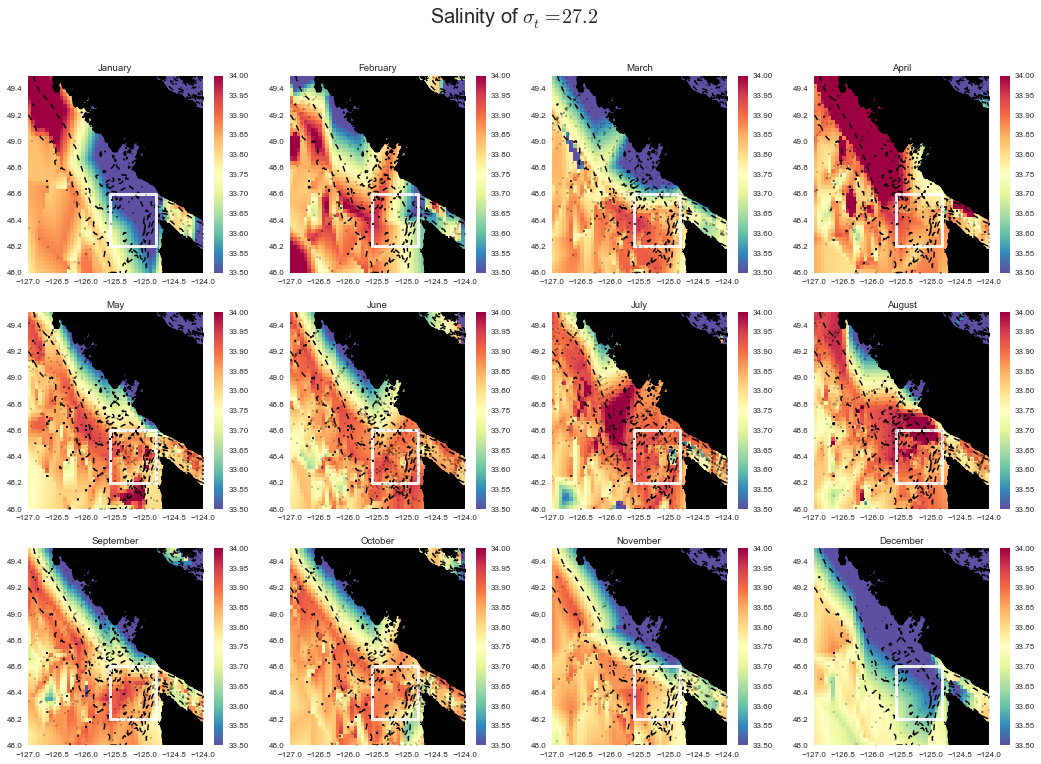

In [21]:
plt.figure(figsize=(18,12))
for ii in range(1,13):
    plt.subplot(3,4,ii)
    (lon_region,lat_region,grid_dat,tmp) = TSmode.get_isopyc_surface(mnth_csts[ii-1],27.2,'Salinity',[-127,-124],[48,49.5])
    plt.pcolormesh(lon_region,lat_region,grid_dat,cmap='Spectral_r',shading='interp')
    plt.clim((33.5,34))
    plt.colorbar()
    plt.plot([-125.6,-124.8,-124.8,-125.6,-125.6],[48.2,48.2,48.6,48.6,48.2],'-w',lw=3,alpha=0.9)
    plt.contour(wcvi_top['lon'],wcvi_top['lat'],wcvi_top['dpth'],[-250,-100,0],colors='k')
    plt.contourf(wcvi_top['lon'],wcvi_top['lat'],wcvi_top['dpth'],[0,0],colors='k',lw=1)
    
    plt.plot([k['Longitude'] for k in mnth_csts[ii-1]],[k['Latitude'] for k in mnth_csts[ii-1]],'.k',ms=2)
    plt.xlim((-127,-124))
    plt.ylim((48,49.5))
    plt.title(calendar.month_name[ii])
plt.suptitle(r'Salinity of $\sigma_t = 27.2$',fontsize=20)
plt.show()

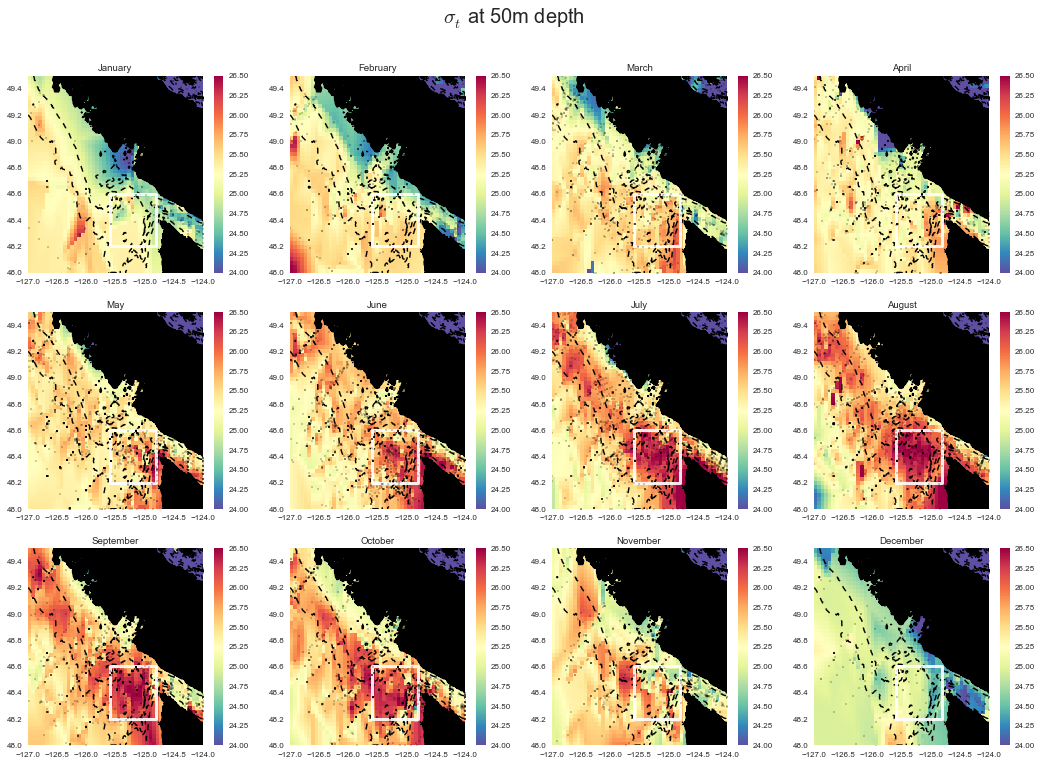

In [24]:
plt.figure(figsize=(18,12))
for ii in range(1,13):
    plt.subplot(3,4,ii)
    (lon_region,lat_region,grid_dat,tmp) = TSmode.get_depth_surface(mnth_csts[ii-1],50,'sigmaT',[-127,-124],[48,49.5])
    plt.pcolormesh(lon_region,lat_region,grid_dat,cmap='Spectral_r',shading='interp')
    plt.clim((24,26.5))
    plt.colorbar()
    plt.plot([-125.6,-124.8,-124.8,-125.6,-125.6],[48.2,48.2,48.6,48.6,48.2],'-w',lw=3,alpha=0.9)
    plt.contour(wcvi_top['lon'],wcvi_top['lat'],wcvi_top['dpth'],[-250,-100,0],colors='k')
    plt.contourf(wcvi_top['lon'],wcvi_top['lat'],wcvi_top['dpth'],[0,0],colors='k',lw=1)
    
    plt.plot([k['Longitude'] for k in mnth_csts[ii-1]],[k['Latitude'] for k in mnth_csts[ii-1]],'.k',ms=2)
    plt.xlim((-127,-124))
    plt.ylim((48,49.5))
    plt.title(calendar.month_name[ii])
plt.suptitle(r'$\sigma_t$ at 50m depth',fontsize=20)
plt.show()

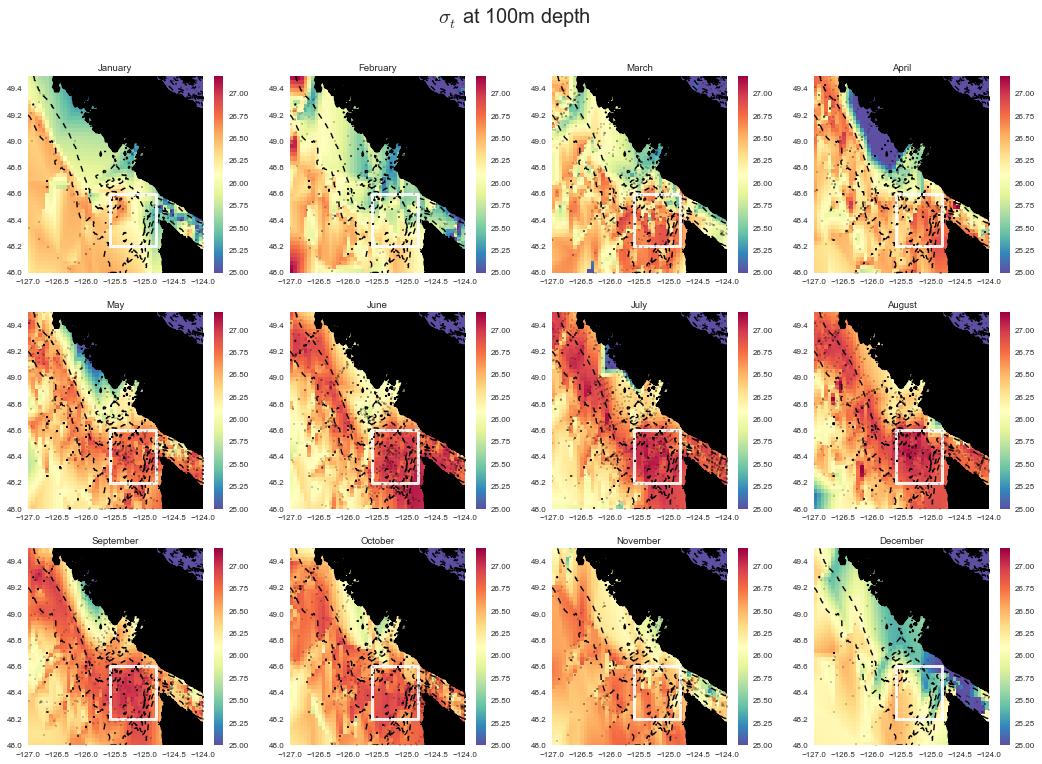

In [28]:
plt.figure(figsize=(18,12))
for ii in range(1,13):
    plt.subplot(3,4,ii)
    (lon_region,lat_region,grid_dat,tmp) = TSmode.get_depth_surface(mnth_csts[ii-1],100,'sigmaT',[-127,-124],[48,49.5])
    plt.pcolormesh(lon_region,lat_region,grid_dat,cmap='Spectral_r',shading='interp')
    plt.clim((25,27.2))
    plt.colorbar()
    plt.plot([-125.6,-124.8,-124.8,-125.6,-125.6],[48.2,48.2,48.6,48.6,48.2],'-w',lw=3,alpha=0.9)
    plt.contour(wcvi_top['lon'],wcvi_top['lat'],wcvi_top['dpth'],[-250,-100,0],colors='k')
    plt.contourf(wcvi_top['lon'],wcvi_top['lat'],wcvi_top['dpth'],[0,0],colors='k',lw=1)
    
    plt.plot([k['Longitude'] for k in mnth_csts[ii-1]],[k['Latitude'] for k in mnth_csts[ii-1]],'.k',ms=2)
    plt.xlim((-127,-124))
    plt.ylim((48,49.5))
    plt.title(calendar.month_name[ii])
plt.suptitle(r'$\sigma_t$ at 100m depth',fontsize=20)
plt.show()